In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import joblib

In [2]:
# from skimage.io import imread
# from skimage.transform import resize

# def resize_all(src, pklname, width=150, height=None):
#     height = height if height is not None else width
    
#     data = dict()
#     data['description'] = 'resized ({0}x{1}) animal images in rgb.'.format(int(width), int(height))
#     data['label'] = []
#     data['filename'] = []
#     data['data'] = []
    
#     pklname = f"{pklname}_{width}x{height}px.pk1"
    
#     for subdir in os.listdir(src):
#         print(subdir)
#         current_path = os.path.join(src, subdir)
        
#         for file in os.listdir(current_path):
#             if file[-3:] in {'jpg', 'png'}:
#                 im = imread(os.path.join(current_path, file))
#                 im = resize(im, (width, height))
#                 data['label'].append(subdir[:-4])
#                 data['filename'].append(file)
#                 data['data'].append(im)
                
#     joblib.dump(data, pklname)

In [3]:
# data_path = os.path.join("C:/Users/ss/Desktop/0study/TML2221 - MACHINE LEARNING/2 Tutorial/lab 11/AnimalFace")
# pklname = 'animal_faces'
# width = 50

# resize_all(src=data_path, pklname=pklname, width=width, height=None)

DeerHead
EagleHead
LionHead
PandaHead
TigerHead


In [3]:
data = joblib.load("animal_faces_50x50px.pk1")

print("No of sample : ", len(data['data']))
print("Description : ", data['description'])
print("Image shape : ", len(data['data'][0].shape))
print("Label : ", np.unique(data['label']))

No of sample :  524
Description :  resized (50x50) animal images in rgb.
Image shape :  3
Label :  ['Deer' 'Eagle' 'Lion' 'Panda' 'Tiger']


In [4]:
from collections import Counter

Counter(data['label'])

Counter({'Deer': 101, 'Eagle': 97, 'Lion': 97, 'Panda': 117, 'Tiger': 112})

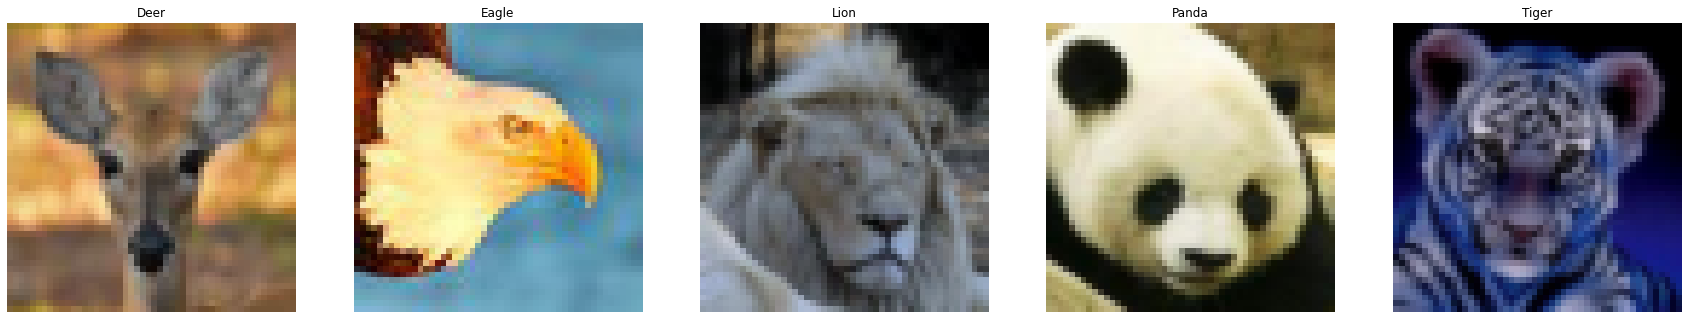

In [5]:
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))

fig.set_size_inches(30,10)

for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [6]:
X = np.array(data['data'])
y = np.array(data['label'])

In [7]:
print(X.shape)
print(y.shape)

(524, 50, 50, 3)
(524,)


In [8]:
import pandas as pd

y = pd.Series(y, dtype='category').cat.codes.values

In [9]:
y[0]

0

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(419, 50, 50, 3)
(419,)
(105, 50, 50, 3)
(105,)


In [12]:
X_train_flat = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test_flat = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2]*X_test.shape[3])

In [13]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(419, 7500)
(105, 7500)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)

pca.fit(X_train_flat)

X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)


In [15]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(419, 7500)
(105, 7500)


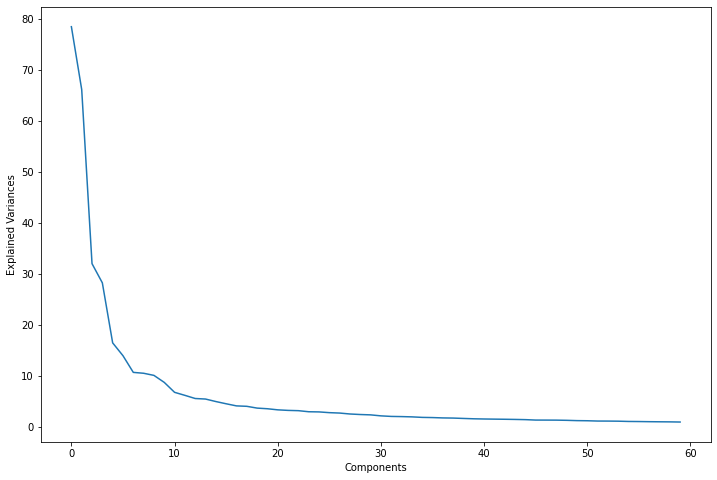

In [16]:
plt.figure(figsize=(12,8))

plt.plot(pca.explained_variance_)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(X_train_pca, y_train)

pred = svm.predict(X_test_pca)

score = svm.score(X_test_pca, y_test)

print(score)

0.7904761904761904


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=np.unique(data['label'])))

              precision    recall  f1-score   support

        Deer       0.95      0.72      0.82        29
       Eagle       0.82      0.82      0.82        17
        Lion       0.55      0.75      0.63        16
       Panda       0.94      0.89      0.91        18
       Tiger       0.74      0.80      0.77        25

    accuracy                           0.79       105
   macro avg       0.80      0.80      0.79       105
weighted avg       0.82      0.79      0.80       105



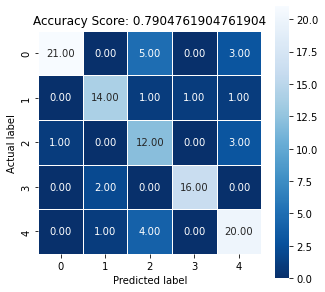

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred, labels=svm.classes_.tolist())

plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5,
           square=True, cmap='Blues_r')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Accuracy Score: {0}'.format(score))

plt.show()

In [26]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100),
                   max_iter=300,
                   verbose=1)

mlp.fit(X_train_pca, y_train)

pred = mlp.predict(X_test_pca)

Iteration 1, loss = 3.37015488
Iteration 2, loss = 2.92882663
Iteration 3, loss = 2.57437604
Iteration 4, loss = 2.25627386
Iteration 5, loss = 1.97761905
Iteration 6, loss = 1.74717461
Iteration 7, loss = 1.55429538
Iteration 8, loss = 1.39560344
Iteration 9, loss = 1.26116106
Iteration 10, loss = 1.14762673
Iteration 11, loss = 1.05112991
Iteration 12, loss = 0.96577081
Iteration 13, loss = 0.89107408
Iteration 14, loss = 0.82330767
Iteration 15, loss = 0.76355141
Iteration 16, loss = 0.71131680
Iteration 17, loss = 0.66362403
Iteration 18, loss = 0.62187655
Iteration 19, loss = 0.58512462
Iteration 20, loss = 0.55279562
Iteration 21, loss = 0.52151156
Iteration 22, loss = 0.49510216
Iteration 23, loss = 0.47193683
Iteration 24, loss = 0.44870736
Iteration 25, loss = 0.43039184
Iteration 26, loss = 0.41254134
Iteration 27, loss = 0.39632252
Iteration 28, loss = 0.38140648
Iteration 29, loss = 0.36734387
Iteration 30, loss = 0.35377333
Iteration 31, loss = 0.34157389
Iteration 32, los

In [27]:
score = mlp.score(X_test_pca, y_test)

print(score)

0.819047619047619


In [28]:
print(classification_report(y_test, pred, target_names=np.unique(data['label'])))

              precision    recall  f1-score   support

        Deer       0.92      0.79      0.85        29
       Eagle       0.93      0.76      0.84        17
        Lion       0.61      0.88      0.72        16
       Panda       0.94      0.89      0.91        18
       Tiger       0.77      0.80      0.78        25

    accuracy                           0.82       105
   macro avg       0.83      0.82      0.82       105
weighted avg       0.84      0.82      0.82       105



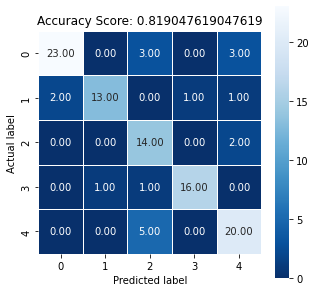

In [29]:
cm = confusion_matrix(y_test, pred, labels=mlp.classes_.tolist())

plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5,
           square=True, cmap='Blues_r')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Accuracy Score: {0}'.format(score))

plt.show()

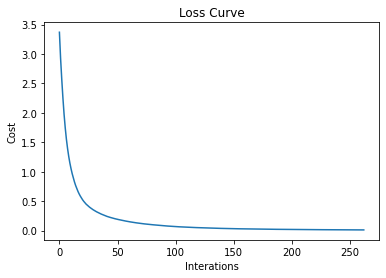

In [30]:
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Interations')
plt.ylabel('Cost')
plt.show()

In [50]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 20),
                   max_iter=500,
                   verbose=1)

mlp.fit(X_train_flat, y_train)

pred = mlp.predict(X_test_flat)

Iteration 1, loss = 1.88382844
Iteration 2, loss = 1.85407200
Iteration 3, loss = 1.40935492
Iteration 4, loss = 1.40840375
Iteration 5, loss = 1.22759793
Iteration 6, loss = 1.29497186
Iteration 7, loss = 1.04716575
Iteration 8, loss = 1.19460635
Iteration 9, loss = 1.09375951
Iteration 10, loss = 1.01919449
Iteration 11, loss = 1.03958402
Iteration 12, loss = 0.94632520
Iteration 13, loss = 0.90992858
Iteration 14, loss = 0.95940634
Iteration 15, loss = 0.90741271
Iteration 16, loss = 0.87753190
Iteration 17, loss = 0.84095022
Iteration 18, loss = 0.85816276
Iteration 19, loss = 0.80918155
Iteration 20, loss = 0.79762075
Iteration 21, loss = 0.77862144
Iteration 22, loss = 0.73437610
Iteration 23, loss = 0.75146276
Iteration 24, loss = 0.72759528
Iteration 25, loss = 0.69493268
Iteration 26, loss = 0.66641290
Iteration 27, loss = 0.67904034
Iteration 28, loss = 0.63174764
Iteration 29, loss = 0.61937122
Iteration 30, loss = 0.77028791
Iteration 31, loss = 0.66009680
Iteration 32, los

Iteration 253, loss = 0.00269454
Iteration 254, loss = 0.00263516
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [54]:
score = mlp.score(X_test_flat, y_test)

print(score)

0.7904761904761904


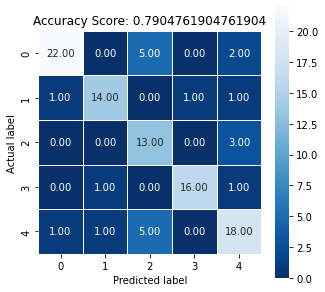

In [55]:
cm = confusion_matrix(y_test, pred, labels=mlp.classes_.tolist())

plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt='.2f', linewidth=0.5,
           square=True, cmap='Blues_r')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Accuracy Score: {0}'.format(score))

plt.show()

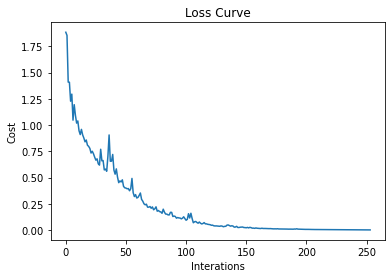

In [56]:
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Interations')
plt.ylabel('Cost')
plt.show()